# 1. 构造数据集

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
w, b = 1.8, 2.5
np.random.seed(0)
x = np.random.rand(100) * 4 - 2
noise = np.random.randn(100) / 3
y = w * x + b + noise

In [21]:
x = x.reshape(-1, 1)
x.shape, y.shape

((100, 1), (100,))

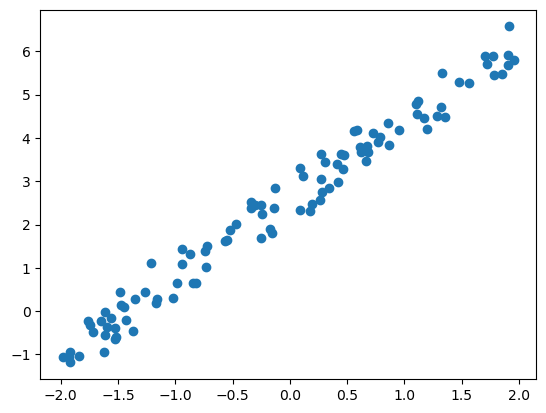

In [22]:
plt.scatter(x, y)
plt.show()

# 2. sklearn中的神经网络

In [23]:
from sklearn.neural_network import MLPRegressor

In [24]:
reg = MLPRegressor(
    hidden_layer_sizes=(1,),  # 隐藏层结构：只有1个神经元的单层隐藏层
    activation='identity', # 激活函数：使用identity (f(x) = x)，即线性激活函数 这使得整个网络成为线性模型
    learning_rate_init=0.01, # 学习率：每次权重更新的步长 ,较小的学习率(0.01)可以确保训练稳定性
    random_state=233 # 随机种子：确保每次训练结果的可重复性
)

In [25]:
reg.fit(x, y)

MLPRegressor(activation='identity', hidden_layer_sizes=(1,),
             learning_rate_init=0.01, random_state=233)

In [26]:
reg.score(x, y)

0.974674992013746

In [27]:
y_pred = reg.predict(x)

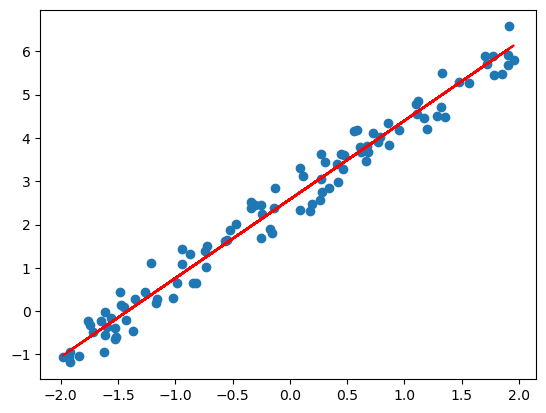

In [28]:
plt.scatter(x, y)
plt.plot(x, y_pred, c = 'red')
plt.show()

In [29]:
w1, w2 = np.array(reg.coefs_).reshape(-1)
b1, b2 = np.array(reg.intercepts_).reshape(-1)
print(w1, w2, b1, b2)

-2.0230772887975506 -0.8994147672147477 0.20843202333485145 2.7673419504355397


In [30]:
w1 * w2, w2 * b1 + b2

(np.float64(1.8195855887612917), np.float64(2.5798751106877256))

# 3. 反向传播权重更新

In [31]:
# 随机初始化4个参数
w1, b1, w2, b2 = np.random.randn(4)
w1, b1, w2, b2

(np.float64(-0.35399391125348395),
 np.float64(-1.3749512934180188),
 np.float64(-0.6436184028328905),
 np.float64(-2.2234031522244266))

In [32]:
y_real = y.reshape(-1, 1) # 真实值
lr = 0.01  # 学习率

In [33]:
for i in range(100):
    # 前向传播: 定义神经元线性函数和损失函数
    y1 = w1 * x + b1
    y_pred = w2 * y1 + b2
    loss = ((y_real - y_pred) ** 2) / 2
    
    # 反向传播: 计算梯度
    dy = y_pred - y_real    # 1. 对损失函数求导
    dy1 = dy * w2           # 2. 对y_pred求导
    dw1 = np.mean(x * dy1)  # 3. 对y1求导
    dw2 = np.mean(y1 * dy)  # 4. 对w2求导
    db1 = np.mean(dy1)      # 5. 对b1求导
    db2 = np.mean(dy)       # 6. 对b2求导
    
    # 更新参数 (这里使用的是随机梯度下降(SGD)的方式更新参数)
    w1 -= lr * dw1
    w2 -= lr * dw2
    b1 -= lr * db1
    b2 -= lr * db2
    
print(w1, b1, w2, b2)

-0.9177449267250191 -2.129914286339166 -1.9504364639229044 -1.5893718385879363


In [34]:
y_pred = w2 * (w1 * x + b1) + b2

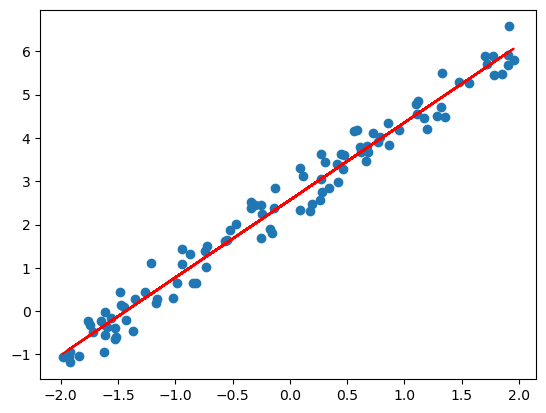

In [35]:
plt.scatter(x, y)
plt.plot(x, y_pred, c = 'red')
plt.show()

In [36]:
# 可以看到结果和使用MLPRegressor的结果是很接近的
w1 * w2, w2 * b1 + b2

(np.float64(1.7900031696647312), np.float64(2.564890650518303))